# Uploading Laibraries

In [78]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
import matplotlib.pyplot as plt


# Load Diamond DataSet

In [79]:
df=sns.load_dataset('diamonds')

In [80]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Preprocessing

In [81]:
df.shape

(53940, 10)

In [82]:
df.duplicated().sum()

146

In [83]:
df.drop_duplicates(inplace=True)

In [84]:
df.shape

(53794, 10)

In [85]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [86]:
x=df.drop("price",axis=1)
y=df.price

# Encoding Data

In [87]:
le=LabelEncoder()

In [88]:
x['cut']=le.fit_transform(x['cut'])
x['color']=le.fit_transform(x['color'])
x['clarity']=le.fit_transform(x['clarity'])

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Standardize Data

In [90]:
scalar=StandardScaler()

In [91]:
x_train_scaled=scalar.fit_transform(x_train)
x_test_scaled=scalar.fit_transform(x_test)

# Data Modeling With Neural Networks

In [92]:
model=tf.keras.models.Sequential([
    
    #input layer 
    #input_shape is the no of features in x_train
    tf.keras.layers.InputLayer(input_shape=x_train.shape[1:]),
    
    #hidden layer 
    tf.keras.layers.Dense(16,activation='relu'),
    
    
    # output layer
    # 1 neuron used in output layer because of regression problem
    tf.keras.layers.Dense(1)
    
    
    
])

In [93]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [94]:
history=model.fit(x_train,y_train,epochs=4,verbose=1,validation_split=0.2)

Epoch 1/4
1076/1076 [==============================] - 2s 2ms/step - loss: 27967336.0000 - val_loss: 22545796.0000
Epoch 2/4
1076/1076 [==============================] - 2s 2ms/step - loss: 17821062.0000 - val_loss: 15802223.0000
Epoch 3/4
1076/1076 [==============================] - 2s 2ms/step - loss: 15256441.0000 - val_loss: 15243032.0000
Epoch 4/4
1076/1076 [==============================] - 2s 2ms/step - loss: 14843505.0000 - val_loss: 14757777.0000


In [95]:
loss=model.evaluate(x_test,y_test)
print(f"Test loss:{loss}")


337/337 [==============================] - 1s 1ms/step - loss: 13875037.0000
Test loss:13875037.0


In [96]:
from tensorflow.keras.callbacks import EarlyStopping

In [97]:
early_stopping=EarlyStopping(
    monitor='val_loss' #monitor validation loss
   ,patience=2   # no of epochs to wait before stop the training
   ,restore_best_weights=True #restore the best wait of the model
)

In [98]:
model.fit(x_train,y_train,epochs=5,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/5
1076/1076 [==============================] - 2s 2ms/step - loss: 14268152.0000 - val_loss: 14105966.0000
Epoch 2/5
1076/1076 [==============================] - 2s 2ms/step - loss: 13564787.0000 - val_loss: 13359967.0000
Epoch 3/5
1076/1076 [==============================] - 2s 2ms/step - loss: 12772658.0000 - val_loss: 12528431.0000
Epoch 4/5
1076/1076 [==============================] - 2s 2ms/step - loss: 11911361.0000 - val_loss: 11642326.0000
Epoch 5/5
1076/1076 [==============================] - 2s 2ms/step - loss: 11006482.0000 - val_loss: 10722105.0000


In [99]:
print(f"Trained for {len(model.history.epoch)} epochs")

Trained for 5 epochs


In [100]:
history=model.fit(x_train,y_train,epochs=5,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/5
1076/1076 [==============================] - 2s 2ms/step - loss: 10084158.0000 - val_loss: 9803189.0000
Epoch 2/5
1076/1076 [==============================] - 2s 2ms/step - loss: 9163551.0000 - val_loss: 8885051.0000
Epoch 3/5
1076/1076 [==============================] - 2s 2ms/step - loss: 8262634.0000 - val_loss: 7999510.5000
Epoch 4/5
1076/1076 [==============================] - 2s 2ms/step - loss: 7400717.5000 - val_loss: 7155933.0000
Epoch 5/5
1076/1076 [==============================] - 2s 2ms/step - loss: 6592067.0000 - val_loss: 6378789.0000


# Graph Plotting of Loss With Train Data & Validation Data

C:\Users\abdul\AppData\Local\Temp\ipykernel_14016\494003223.py:6: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('train','validation',loc='upper left')
C:\Users\abdul\AppData\Local\Temp\ipykernel_14016\494003223.py:6: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('train','validation',loc='upper left')
C:\Users\abdul\AppData\Local\Temp\ipykernel_14016\494003223.py:6: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('train','validation',loc='upper left')
C:\User

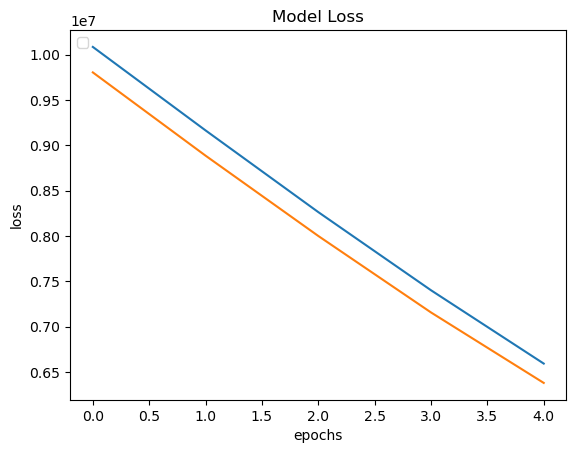

In [101]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend('train','validation',loc='upper left')
plt.show()

In [102]:
history=model.fit(x_train,y_train,epochs=5,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/5
1076/1076 [==============================] - 2s 2ms/step - loss: 5854870.5000 - val_loss: 5684212.0000
Epoch 2/5
1076/1076 [==============================] - 2s 2ms/step - loss: 5212809.0000 - val_loss: 5081966.0000
Epoch 3/5
1076/1076 [==============================] - 2s 2ms/step - loss: 4659132.0000 - val_loss: 4565277.0000
Epoch 4/5
1076/1076 [==============================] - 2s 2ms/step - loss: 4186592.7500 - val_loss: 4125809.7500
Epoch 5/5
1076/1076 [==============================] - 2s 2ms/step - loss: 3798667.7500 - val_loss: 3775256.0000


C:\Users\abdul\AppData\Local\Temp\ipykernel_14016\494003223.py:6: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('train','validation',loc='upper left')
C:\Users\abdul\AppData\Local\Temp\ipykernel_14016\494003223.py:6: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('train','validation',loc='upper left')
C:\Users\abdul\AppData\Local\Temp\ipykernel_14016\494003223.py:6: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('train','validation',loc='upper left')
C:\User

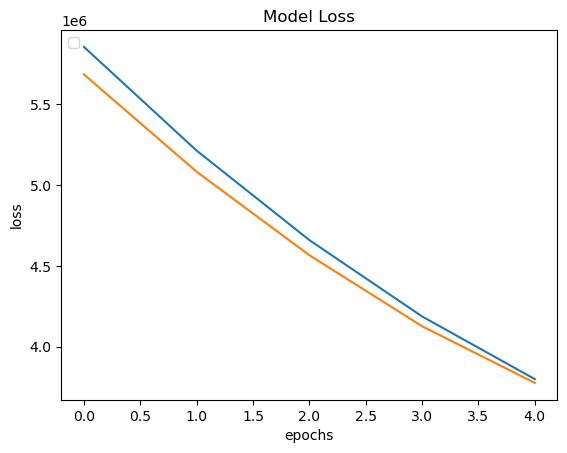

In [103]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend('train','validation',loc='upper left')
plt.show()